# Feature Scaling
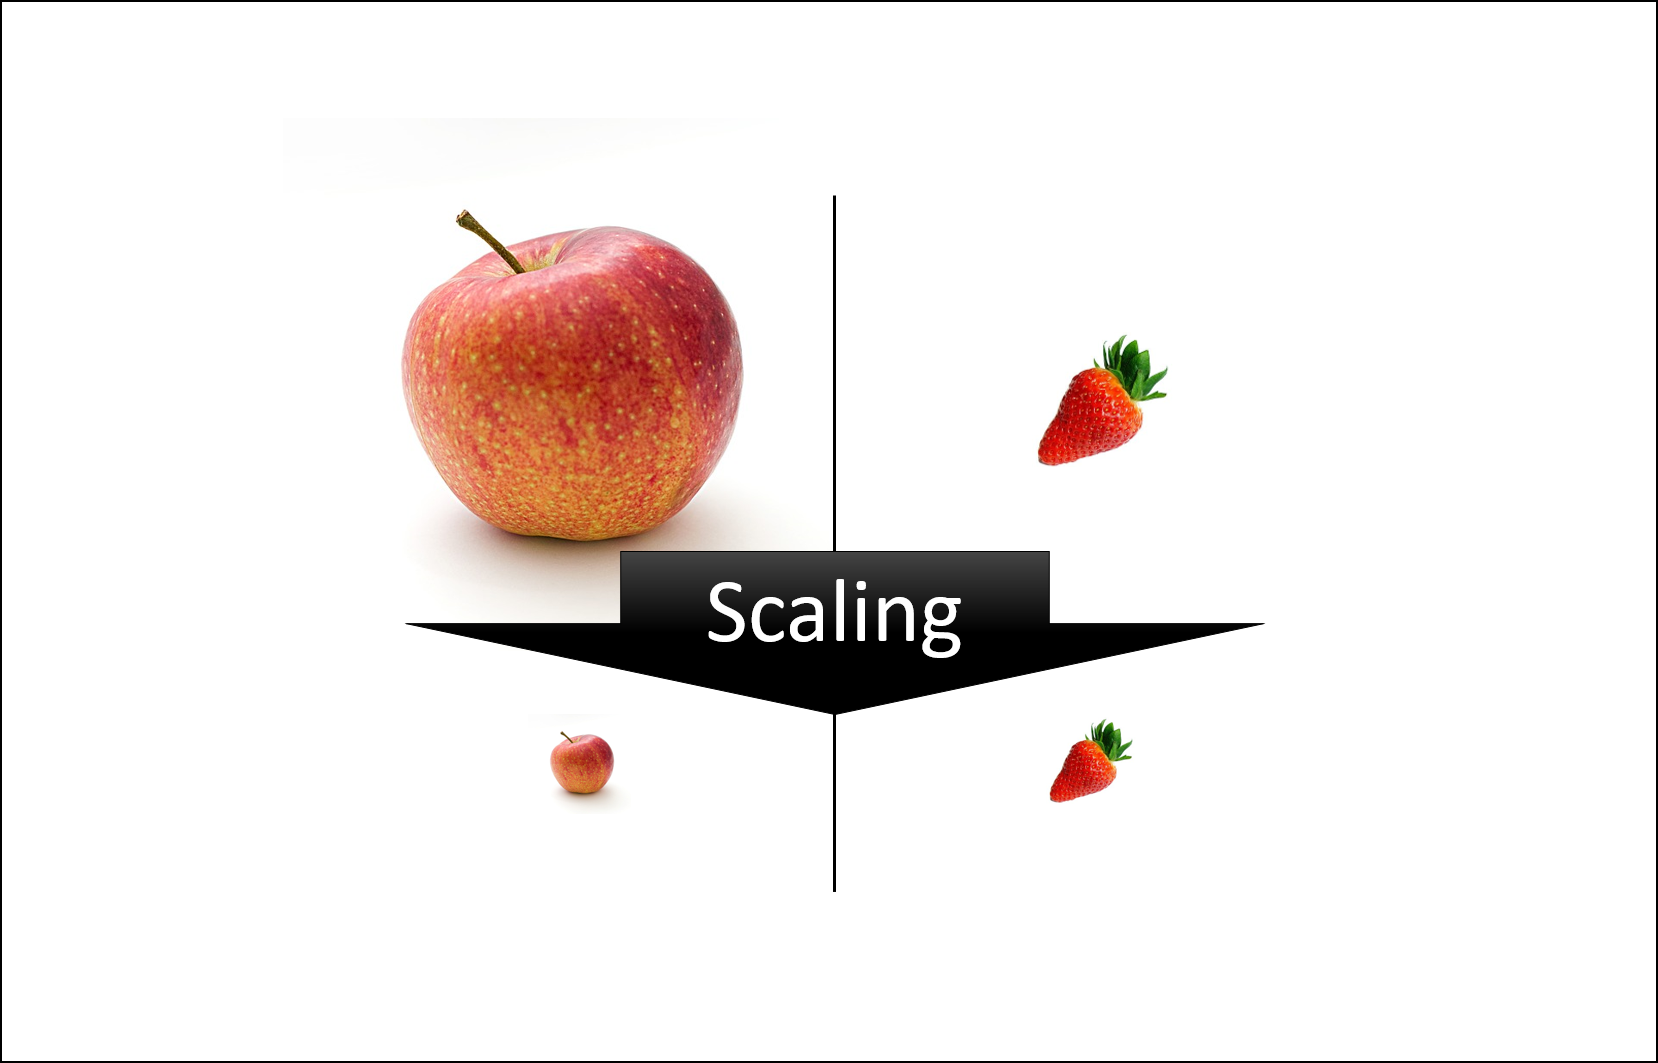

**Definición** Es un paso del **preprocesamiento de datos** que se aplica a variables independientes o características de los datos. Básicamente, ayuda a normalizar los datos dentro de un rango particular. A veces, también ayuda a acelerar los cálculos en un algoritmo.



Ejemplos de algoritmos donde se usa feature scaling:

1. **K-Means** usa la medida de distancia euclidiana aquí, la escala de las características importa.
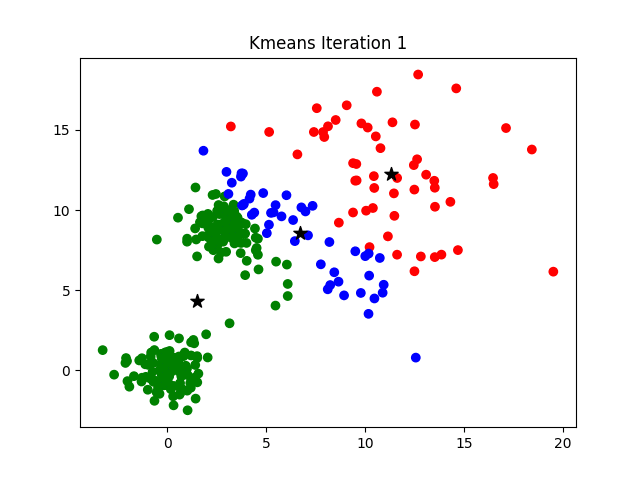

2. **K-Nearest-Neighbors** también requiere escalado de características.
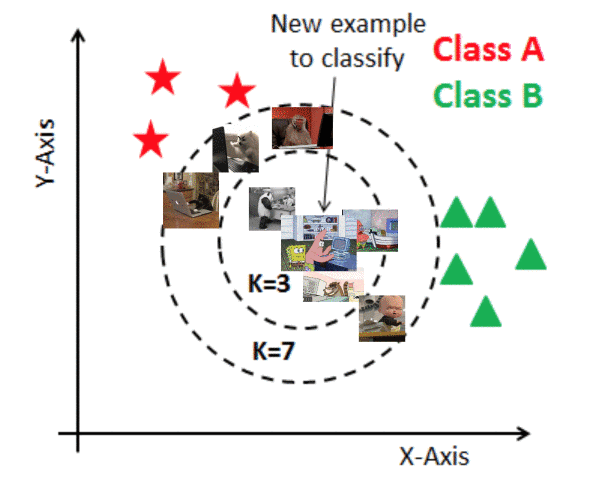

3. **Análisis de componentes principales (PCA)**: tecnica de reduccion de dimensionalidad que intenta obtener la característica con la máxima varianza, aquí también se requiere de feature scaling.

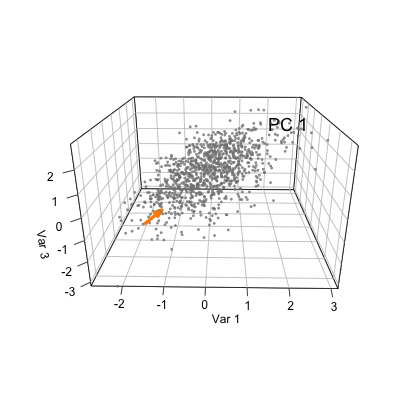




In [28]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing
import plotly.express as px

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Tomamos dos distribuciones de las 5 posibles
# La columna 0 tiene una distribucion de cola larga 
# Columna 5 Tiene pocos outliers pero muy grandes.

X = X_full[:, [0, 5]]
X

Automatically created module for IPython interactive environment


array([[8.3252    , 2.55555556],
       [8.3014    , 2.10984183],
       [7.2574    , 2.80225989],
       ...,
       [1.7       , 2.3256351 ],
       [1.8672    , 2.12320917],
       [2.3886    , 2.61698113]])

In [29]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
np.max(X[:,1])

1243.3333333333333

(array([ 365., 1882., 3570., 3866., 3484., 2614., 1832., 1158.,  683.,
         377.,  294.,  134.,   72.,  106.,   69.,   24.,   24.,   23.,
           6.,   57.]),
 array([ 0.4999 ,  1.22491,  1.94992,  2.67493,  3.39994,  4.12495,
         4.84996,  5.57497,  6.29998,  7.02499,  7.75   ,  8.47501,
         9.20002,  9.92503, 10.65004, 11.37505, 12.10006, 12.82507,
        13.55008, 14.27509, 15.0001 ]),
 <BarContainer object of 20 artists>)

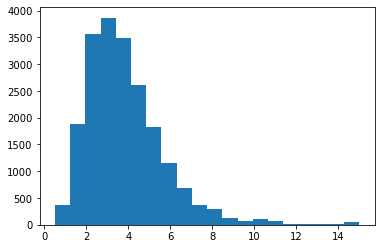

In [5]:
plt.hist(X[:,0],bins=20)

(array([2.0636e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([6.92307692e-01, 1.24956410e+02, 2.49220513e+02, 3.73484615e+02,
        4.97748718e+02, 6.22012821e+02, 7.46276923e+02, 8.70541026e+02,
        9.94805128e+02, 1.11906923e+03, 1.24333333e+03]),
 <BarContainer object of 10 artists>)

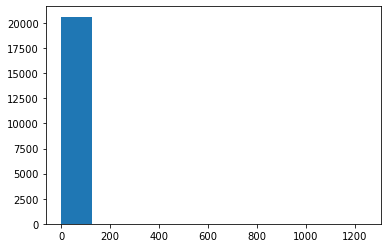

In [6]:
plt.hist(X[:,1],bins=10)

In [7]:
print(np.mean(X[:,1]))
print(np.min(X[:,1]))
print(np.max(X[:,1]))

3.0706551594363742
0.6923076923076923
1243.3333333333333


# 1) StandardScaler

$$z= \frac{X- \mu}{s}$$

```with_mean = True```, ```with_std = True``` por defecto


In [8]:
SE=StandardScaler().fit_transform(X)

In [9]:
SE

array([[ 2.34476576, -0.04959654],
       [ 2.33223796, -0.09251223],
       [ 1.7826994 , -0.02584253],
       ...,
       [-1.14259331, -0.0717345 ],
       [-1.05458292, -0.09122515],
       [-0.78012947, -0.04368215]])

(array([2.0634e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -0.22899997,   5.75340518,  11.73581034,  17.7182155 ,
         23.70062066,  29.68302582,  35.66543097,  41.64783613,
         47.63024129,  53.61264645,  59.59505161,  65.57745677,
         71.55986192,  77.54226708,  83.52467224,  89.5070774 ,
         95.48948256, 101.47188771, 107.45429287, 113.43669803,
        119.41910319]),
 <BarContainer object of 20 artists>)

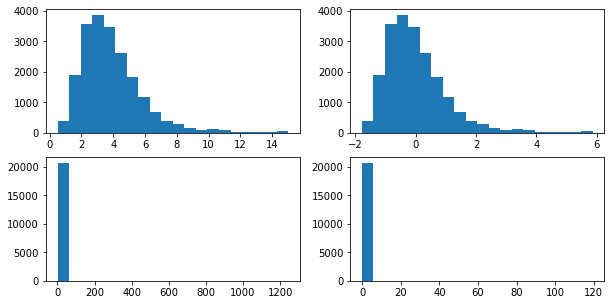

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=20)
plt.subplot(222)
plt.hist(SE[:,0],bins=20)
plt.subplot(223)
plt.hist(X[:,1],bins=20)
plt.subplot(224)
plt.hist(SE[:,1],bins=20)

# 2) MinMaxScaler

$$z= \frac{x- min(x)}{max(x)-min(x)}$$



In [11]:
MinMax=MinMaxScaler().fit_transform(X)
MinMax

array([[0.53966842, 0.00149943],
       [0.53802706, 0.00114074],
       [0.46602805, 0.00169796],
       ...,
       [0.08276438, 0.0013144 ],
       [0.09429525, 0.0011515 ],
       [0.13025338, 0.00154886]])

(array([2.0634e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

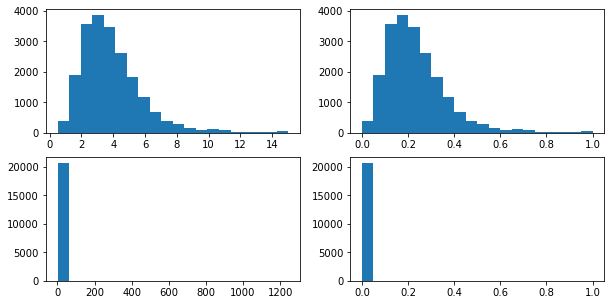

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=20)
plt.subplot(222)
plt.hist(MinMax[:,0],bins=20)
plt.subplot(223)
plt.hist(X[:,1],bins=20)
plt.subplot(224)
plt.hist(MinMax[:,1],bins=20)

**Conclusion** Este metodo al igual que StandardScaler, no garantiza tener estructuras balanceadas en presencia de outliers

# 3) MaxAbsScaler
$$z= |\frac{x}{max(x)}|$$






In [13]:
Maxabs=MaxAbsScaler().fit_transform(X)
Maxabs

array([[0.55500963, 0.00205541],
       [0.55342298, 0.00169692],
       [0.48382344, 0.00225383],
       ...,
       [0.11333258, 0.00187048],
       [0.12447917, 0.00170767],
       [0.15923894, 0.00210481]])

(array([2.0634e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.56815838e-04, 5.05289750e-02, 1.00501134e-01, 1.50473293e-01,
        2.00445453e-01, 2.50417612e-01, 3.00389771e-01, 3.50361930e-01,
        4.00334090e-01, 4.50306249e-01, 5.00278408e-01, 5.50250567e-01,
        6.00222726e-01, 6.50194886e-01, 7.00167045e-01, 7.50139204e-01,
        8.00111363e-01, 8.50083522e-01, 9.00055682e-01, 9.50027841e-01,
        1.00000000e+00]),
 <BarContainer object of 20 artists>)

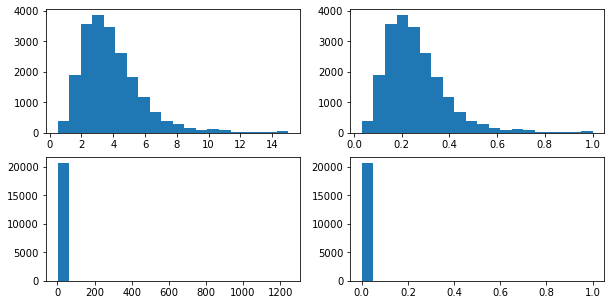

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=20)
plt.subplot(222)
plt.hist(Maxabs[:,0],bins=20)
plt.subplot(223)
plt.hist(X[:,1],bins=20)
plt.subplot(224)
plt.hist(Maxabs[:,1],bins=20)

**Conclusion** Al igual que los anteriores dos metodos sensible a outliers

# 4) RobustScaler

$$z= \frac{x -med(X)}{IQR(x)}$$



In [15]:
Rob=RobustScaler().fit_transform(X)
Rob

array([[ 2.1975824 , -0.30798124],
       [ 2.18666422, -0.83080046],
       [ 1.70773218, -0.01859871],
       ...,
       [-0.84170929, -0.57767639],
       [-0.76500677, -0.81512066],
       [-0.525816  , -0.23592945]])

(array([2.0634e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -2.49355853,   70.38692234,  143.26740322,  216.14788409,
         289.02836497,  361.90884584,  434.78932671,  507.66980759,
         580.55028846,  653.43076934,  726.31125021,  799.19173108,
         872.07221196,  944.95269283, 1017.83317371, 1090.71365458,
        1163.59413545, 1236.47461633, 1309.3550972 , 1382.23557808,
        1455.11605895]),
 <BarContainer object of 20 artists>)

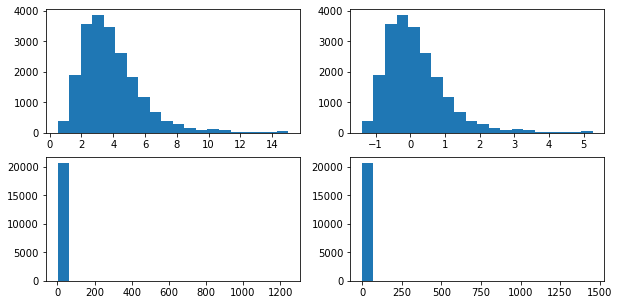

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=20)
plt.subplot(222)
plt.hist(Rob[:,0],bins=20)
plt.subplot(223)
plt.hist(X[:,1],bins=20)
plt.subplot(224)
plt.hist(Rob[:,1],bins=20)

A diferencia de los escaladores anteriores, las estadísticas de centrado y escalado de RobustScaler se basan en percentiles y, por lo tanto, no están influenciadas por unos pocos valores atípicos marginales muy grandes. En consecuencia, el rango resultante de los valores de las características transformadas es mayor que para los escaladores anteriores y, lo que es más importante, son aproximadamente similares: para ambas características

Mayoria de valores entre -2 y 3 para el primer caso. Pero sensible a outliers

# 5)PowerTrasformer

Aplica una transformación de potencia a cada característica para hacer que los datos sean más parecidos a los de Gauss con el fin de estabilizar la varianza y minimizar la asimetría. Actualmente se admiten las transformadas de Yeo-Johnson y Box-Cox y el factor de escala óptimo se determina mediante la estimación de máxima verosimilitud en ambos métodos.

# Yeo Johnson

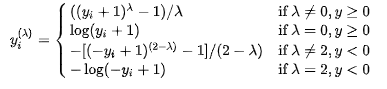

# Box Cox
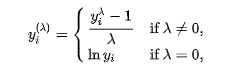


In [17]:
Yeo=PowerTransformer(method='yeo-johnson').fit_transform(X)
Yeo

array([[ 1.90328853, -0.3687632 ],
       [ 1.89708092, -1.18626485],
       [ 1.60436139,  0.00505285],
       ...,
       [-1.5094258 , -0.76445482],
       [-1.32391444, -1.15852734],
       [-0.8195291 , -0.27115865]])

(array([2.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 2.500e+01, 1.350e+02,
        3.880e+02, 9.780e+02, 1.996e+03, 4.326e+03, 5.811e+03, 4.070e+03,
        1.983e+03, 7.120e+02, 1.340e+02, 2.800e+01, 2.000e+01, 1.600e+01,
        3.000e+00, 7.000e+00]),
 array([-6.43797735, -5.81758735, -5.19719735, -4.57680735, -3.95641735,
        -3.33602734, -2.71563734, -2.09524734, -1.47485734, -0.85446734,
        -0.23407734,  0.38631266,  1.00670266,  1.62709266,  2.24748266,
         2.86787266,  3.48826266,  4.10865266,  4.72904267,  5.34943267,
         5.96982267]),
 <BarContainer object of 20 artists>)

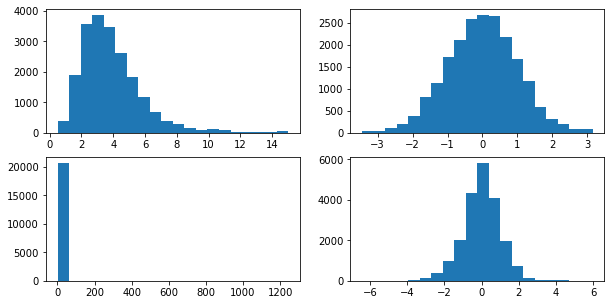

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=20)
plt.subplot(222)
plt.hist(Yeo[:,0],bins=20)
plt.subplot(223)
plt.hist(X[:,1],bins=20)
plt.subplot(224)
plt.hist(Yeo[:,1],bins=20)

**Importante** Tenga en cuenta que Box-Cox solo se puede aplicar a datos estrictamente positivos. El ingreso y el número de hogares resultan ser estrictamente positivos, pero si hay valores negativos, se prefiere la transformada de Yeo-Johnson.

In [19]:
Box=PowerTransformer(method='box-cox').fit_transform(X)
Box

array([[ 1.91629005, -0.35386161],
       [ 1.90969448, -1.17219792],
       [ 1.60197816,  0.01381331],
       ...,
       [-1.49226372, -0.74707212],
       [-1.30436253, -1.14402384],
       [-0.80341014, -0.25755053]])

(array([2.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 4.000e+00, 8.000e+01,
        3.200e+02, 9.530e+02, 2.543e+03, 6.140e+03, 6.612e+03, 2.970e+03,
        8.520e+02, 9.800e+01, 2.600e+01, 1.900e+01, 7.000e+00, 3.000e+00,
        2.000e+00, 4.000e+00]),
 array([-7.74024198, -6.96531908, -6.19039618, -5.41547328, -4.64055039,
        -3.86562749, -3.09070459, -2.31578169, -1.54085879, -0.76593589,
         0.008987  ,  0.7839099 ,  1.5588328 ,  2.3337557 ,  3.1086786 ,
         3.8836015 ,  4.6585244 ,  5.43344729,  6.20837019,  6.98329309,
         7.75821599]),
 <BarContainer object of 20 artists>)

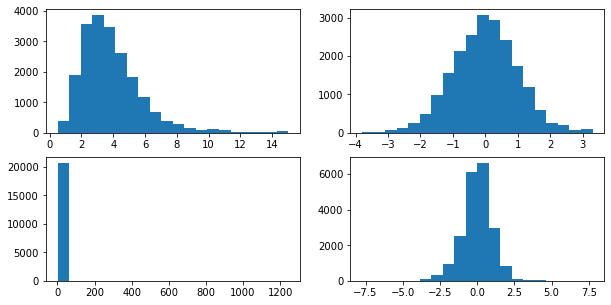

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=20)
plt.subplot(222)
plt.hist(Box[:,0],bins=20)
plt.subplot(223)
plt.hist(X[:,1],bins=20)
plt.subplot(224)
plt.hist(Box[:,1],bins=20)

# 6) Quantile transformer

QuantileTransformer aplica una transformación no lineal de modo que la función de densidad de probabilidad de cada característica se mapea en una distribución uniforme o gaussiana. En este caso, todos los datos, incluidos los valores atípicos, se asignarán a una distribución uniforme con el rango [0, 1], lo que hará que los valores atípicos sean indistinguibles del resto.

RobustScaler y QuantileTransformer son resistentes a valores atípicos en el sentido de que agregar o eliminar valores atípicos en el conjunto de entrenamiento producirá aproximadamente la misma transformación

In [21]:
 Uniform=QuantileTransformer(output_distribution='uniform').fit_transform(X)
 Uniform

array([[0.97251956, 0.32632633],
       [0.9722166 , 0.10948473],
       [0.9484673 , 0.48870885],
       ...,
       [0.06683237, 0.19361646],
       [0.09358576, 0.11356119],
       [0.20832261, 0.36628188]])

(array([516., 517., 515., 515., 513., 519., 515., 515., 521., 515., 516.,
        515., 514., 519., 516., 515., 517., 515., 512., 521., 518., 515.,
        512., 519., 516., 520., 509., 516., 520., 511., 518., 516., 515.,
        517., 518., 514., 516., 517., 516., 516.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

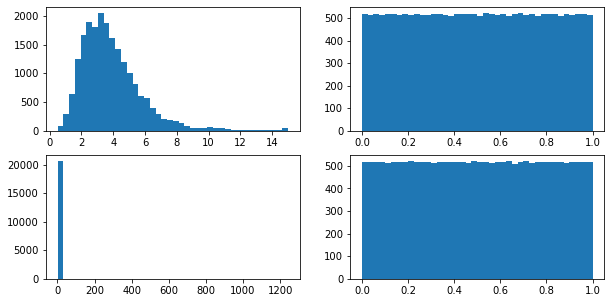

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=40)
plt.subplot(222)
plt.hist(Uniform[:,0],bins=40)
plt.subplot(223)
plt.hist(X[:,1],bins=40)
plt.subplot(224)
plt.hist(Uniform[:,1],bins=40)

In [23]:
 Normal=QuantileTransformer(output_distribution='normal').fit_transform(X)
 Normal

array([[ 1.9191854 , -0.45008015],
       [ 1.91441776, -1.22927299],
       [ 1.63017081, -0.02830649],
       ...,
       [-1.49980567, -0.86464636],
       [-1.31899279, -1.20780475],
       [-0.81225519, -0.34171716]])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 9.000e+00, 3.300e+01, 5.500e+01, 9.700e+01, 1.910e+02,
        3.230e+02, 5.150e+02, 7.750e+02, 1.079e+03, 1.413e+03, 1.732e+03,
        1.980e+03, 2.117e+03, 2.115e+03, 1.983e+03, 1.725e+03, 1.417e+03,
        1.083e+03, 7.720e+02, 5.130e+02, 3.240e+02, 1.900e+02, 1.000e+02,
        5.300e+01, 4.000e+01, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-5.19933758e+00, -4.93937070e+00, -4.67940382e+00, -4.41943695e+00,
        -4.15947007e+00, -3.89950319e+00, -3.63953631e+00, -3.37956943e+00,
        -3.11960255e+00, -2.85963567e+00, -2.59966879e+00, -2.33970191e+00,
        -2.07973503e+00, -1.81976815e+00, -1.55980127e+00, -1.29983440e+00,
        -1.03986752e+00, -7.79900637e-01, -5.19933758e-01, -2.59966879e-01,
         4.89217555e-11,  2.59966879e-01,  5.19933758e-01,  7.79900637e-01,
         1.03986752e+00,  1.29983440e+00,  1.5

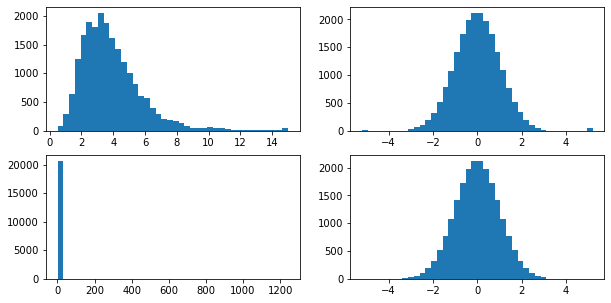

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(221)
scaler = StandardScaler()
plt.hist(X[:,0],bins=40)
plt.subplot(222)
plt.hist(Normal[:,0],bins=40)
plt.subplot(223)
plt.hist(X[:,1],bins=40)
plt.subplot(224)
plt.hist(Normal[:,1],bins=40)

In [25]:
 Normal=QuantileTransformer(output_distribution='normal').fit_transform(X)
 Normal

array([[ 1.9191854 , -0.45008015],
       [ 1.91441776, -1.22927299],
       [ 1.63017081, -0.02830649],
       ...,
       [-1.49980567, -0.86464636],
       [-1.31899279, -1.20780475],
       [-0.81225519, -0.34171716]])